![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.layers import Dense, Activation

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


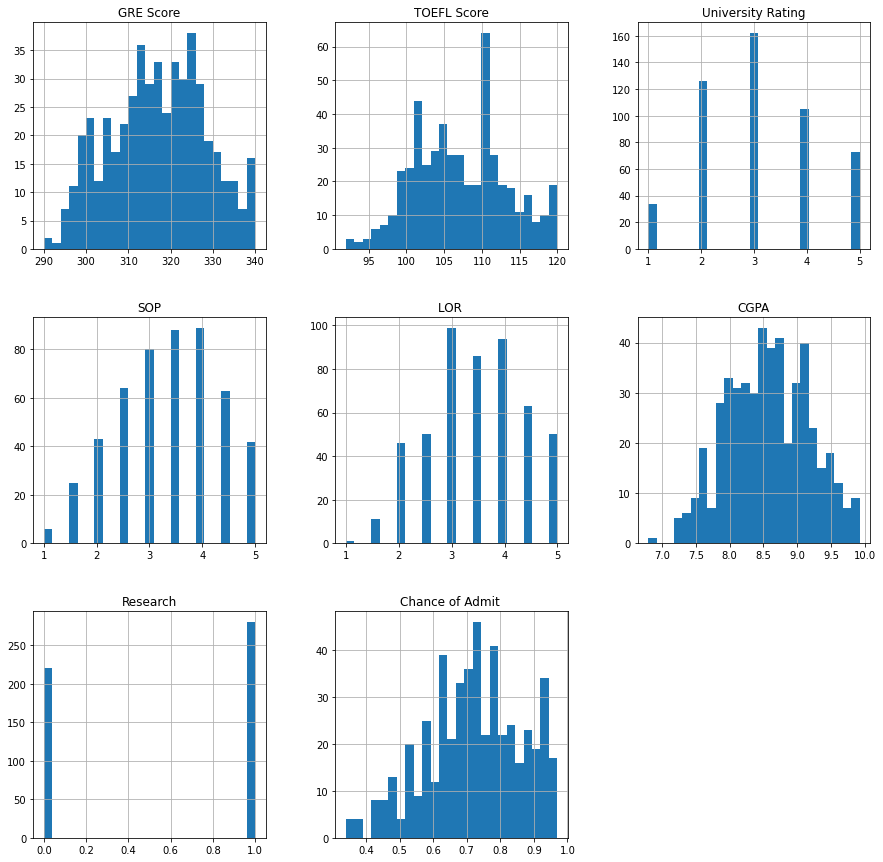

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
#pasa los datos a un array de numpy
Y_train = Y_train.reshape(-1,1)

In [9]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [10]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [11]:
# Celda 1
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) otra opcion
# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


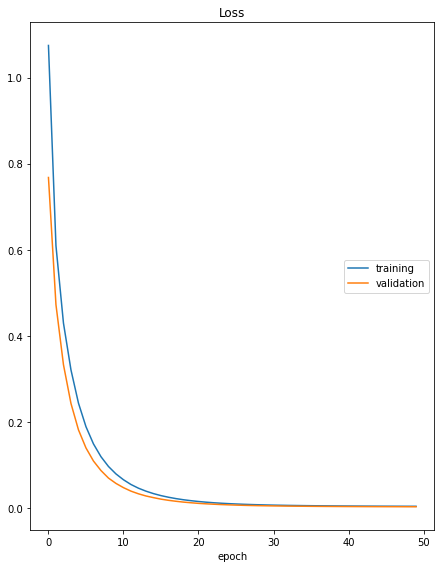

Loss
	training         	 (min:    0.004, max:    1.075, cur:    0.004)
	validation       	 (min:    0.003, max:    0.768, cur:    0.003)
11/11 [==============================] - 0s 25ms/step - loss: 0.0044 - val_loss: 0.0034


In [12]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [13]:
#el desempeño del modelo con las métricas error absoluto medio (MAE)  
y_pred1 = model.predict(X_test)
MAE1= mean_absolute_error(Y_test, y_pred1)
print('MAE: %.3f' % MAE1)


5/5 [==============================] - 0s 3ms/step
MAE: 0.045


In [14]:
#error cuadrático medio (MSE).
MSE1= mean_squared_error(Y_test, y_pred1)
print('MSE: %.3f' % MSE1)

MSE: 0.003


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(64, input_shape=(dims,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [17]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

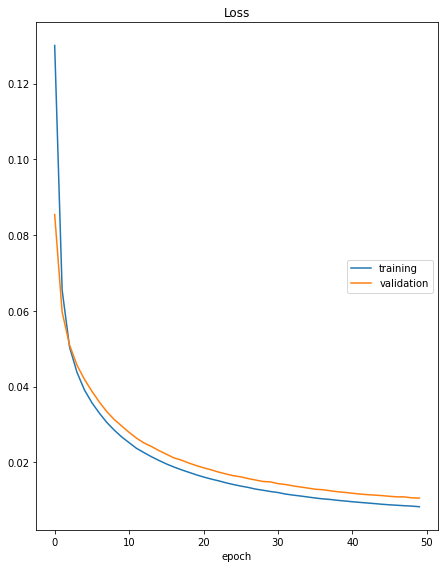

Loss
	training         	 (min:    0.008, max:    0.130, cur:    0.008)
	validation       	 (min:    0.011, max:    0.085, cur:    0.011)
10/10 [==============================] - 0s 25ms/step - loss: 0.0082 - val_loss: 0.0105


In [18]:
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [19]:
#el desempeño del modelo con las métricas error absoluto medio (MAE)  
y_pred2 = model.predict(X_test)
MAE2= mean_absolute_error(Y_test, y_pred2)
print('MAE: %.3f' % MAE2)

5/5 [==============================] - 0s 1ms/step
MAE: 0.079


In [30]:
#error cuadrático medio (MSE).
MSE2= mean_squared_error(Y_test, y_pred2)
print('MSE: %.3f' % MSE2)

MSE: 0.011


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [21]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-traina

In [22]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [23]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [24]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [25]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

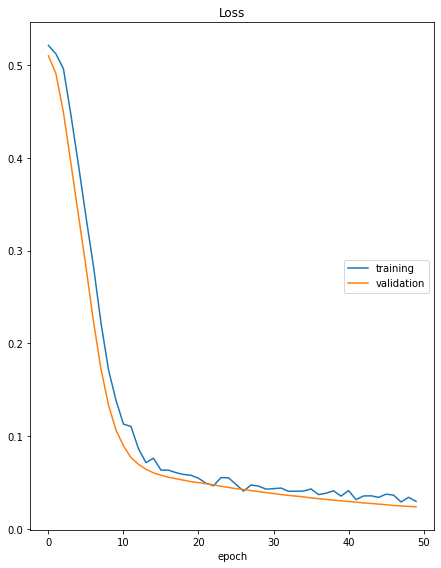

Loss
	training         	 (min:    0.029, max:    0.521, cur:    0.030)
	validation       	 (min:    0.024, max:    0.510, cur:    0.024)
2/2 [==============================] - 0s 186ms/step - loss: 0.0297 - val_loss: 0.0238


In [26]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          verbose=True, 
          epochs=50,
          batch_size=128, 
          validation_data=(X_test,Y_test),
          #callbacks=[best_model, early_stop]),
          callbacks=[PlotLossesKeras()])


In [27]:
#el desempeño del modelo con las métricas error absoluto medio (MAE)  
y_pred3 = model.predict(X_test)
MAE3= mean_absolute_error(Y_test, y_pred3)
print('MAE: %.3f' % MAE3)

5/5 [==============================] - 0s 2ms/step
MAE: 0.125


In [28]:
#error cuadrático medio (MSE).
MSE3= mean_squared_error(Y_test, y_pred3)
print('MSE: %.3f' % MSE3)

MSE: 0.024


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

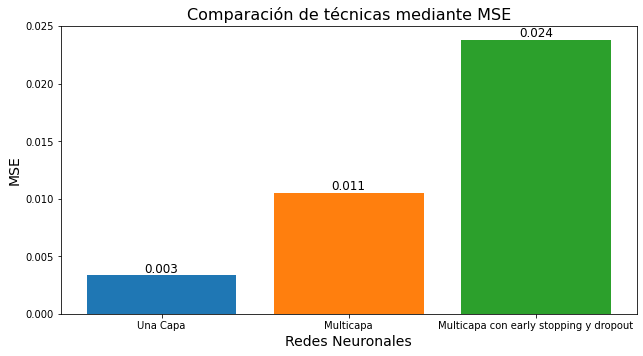

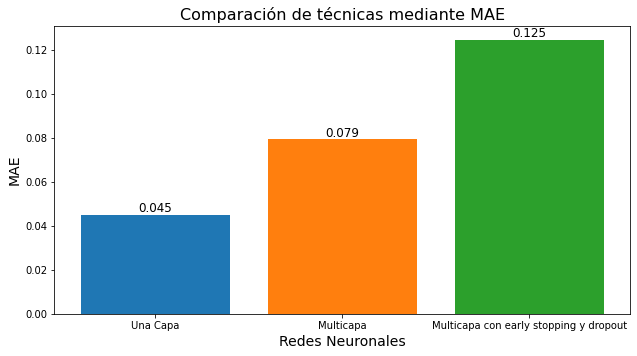

In [31]:
# Celda 4

# la misma gráfica pero con el error cuadrático medio (MSE).
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de técnicas mediante MSE", fontsize=16)
ax.set_xlabel("Redes Neuronales", fontsize=14)
ax.set_ylabel("MSE", fontsize=14)
ejeX = ['Una Capa', 'Multicapa', 'Multicapa con early stopping y dropout']
ejeY = [MSE1, MSE2, MSE3]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ejeX, ejeY = zip(*sorted(zip(ejeX, ejeY), key=lambda x: x[1]))
ax.bar(ejeX,ejeY, color=colors)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], round(y[i],3), ha='center', va='bottom', fontsize=12)
addlabels(ejeX,ejeY,ax)
plt.show()
# la misma gráfica pero con el error absoluto medio (MAE).
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de técnicas mediante MAE", fontsize=16)
ax.set_xlabel("Redes Neuronales", fontsize=14)
ax.set_ylabel("MAE", fontsize=14)
ejeX = ['Una Capa', 'Multicapa', 'Multicapa con early stopping y dropout']
ejeY = [MAE1, MAE2, MAE3]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ejeX, ejeY = zip(*sorted(zip(ejeX, ejeY), key=lambda x: x[1]))
ax.bar(ejeX,ejeY, color=colors)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], round(y[i],3), ha='center', va='bottom', fontsize=12)
addlabels(ejeX,ejeY,ax)
plt.show()



